In [1]:
%%html
<style> table { display: inline-block } </style>

# CAB420 Assigment 2 - Image Files Organizer

| Name   | Student Number |
| :---   | :--- |
| Charmi Raval       | N10510702          |
| Leonardo Villamil  | N10411526          |
| Litian Chen        | N9646922           |
| Tace Stewart       | N9654411           |

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import shutil

from sklearn import preprocessing

## Load Data

In [3]:
# Load data
train = pd.read_csv ('Data/training.csv')
validation = pd.read_csv ('Data/validation.csv')
test = pd.read_csv ('Data/testing.csv')

In [4]:
# Split filename, features and label

X_train = train.drop(['filename', 'accent'], axis=1)
path_train = train['filename'].to_numpy()
y_train = train['accent'].to_numpy()

X_val = validation.drop(['filename', 'accent'], axis=1)
path_val = validation['filename'].to_numpy()
y_val = validation['accent'].to_numpy()

X_test = test.drop(['filename', 'accent'], axis=1)
path_test = test['filename'].to_numpy()
y_test = test['accent'].to_numpy()

In [5]:
# Encode strings into class numbers
labels = np.unique(y_train)

encoder = preprocessing.LabelEncoder()
encoder.fit(y_train)

y_train = encoder.transform(y_train)
y_val = encoder.transform(y_val)
y_test = encoder.transform(y_test)

Let's load the images and reshaped to 224 X 224

In [6]:
# Path to your 'en' folder as downloaded from https://commonvoice.mozilla.org/en/datasets 
path = '/home/leonardo/Downloads/en/'

dim = (224, 224)

# Load image file
def load_image(filename, dim):
    I = cv2.cvtColor(cv2.imread(path + 'spectrograms/' + filename +'.png'), cv2.COLOR_BGR2RGB)/255
    I = cv2.resize(I, dim)
    return I

X_train_I = []
X_val_I = []
X_test_I = []

counter = 0;
total = len(path_train)
print('\nLoading Training data... ')
for filename in path_train:
    counter += 1
    I = load_image(filename, dim)
    X_train_I.append(I)
    print('Loading Training data... %d/%d' %(counter, total))
    if counter == 10:
        break
print('Loading Training data completed %d/%d' %(counter, total))

counter = 0;
total = len(path_val)
print('\nLoading Validation data... ')
for filename in path_val:
    counter += 1
    I = load_image(filename, dim)
    X_val_I.append(I)
    print('Loading Validation data... %d/%d' %(counter, total))
    if counter == 10:
        break
print('Loading Validation data completed %d/%d' %(counter, total))

counter = 0;
total = len(path_test)
print('\nLoading Testing data... ', end='')
for filename in path_test:
    counter += 1
    I = load_image(filename, dim)
    X_test_I.append(I)
    print('Loading Testing data... %d/%d' %(counter, total))
    if counter == 10:
        break
print('Loading Testing data completed %d/%d' %(counter, total))

X_train_I = np.asarray(X_train_I)
X_val_I = np.asarray(X_val_I)
X_test_I = np.asarray(X_test_I)


Loading Training data... 
Loading Training data... 1/89280
Loading Training data... 2/89280
Loading Training data... 3/89280
Loading Training data... 4/89280
Loading Training data... 5/89280
Loading Training data... 6/89280
Loading Training data... 7/89280
Loading Training data... 8/89280
Loading Training data... 9/89280
Loading Training data... 10/89280
Loading Training data completed 10/89280

Loading Validation data... 
Loading Validation data... 1/29759
Loading Validation data... 2/29759
Loading Validation data... 3/29759
Loading Validation data... 4/29759
Loading Validation data... 5/29759
Loading Validation data... 6/29759
Loading Validation data... 7/29759
Loading Validation data... 8/29759
Loading Validation data... 9/29759
Loading Validation data... 10/29759
Loading Validation data completed 10/29759

Loading Testing data... Loading Testing data... 1/29759
Loading Testing data... 2/29759
Loading Testing data... 3/29759
Loading Testing data... 4/29759
Loading Testing data... 5

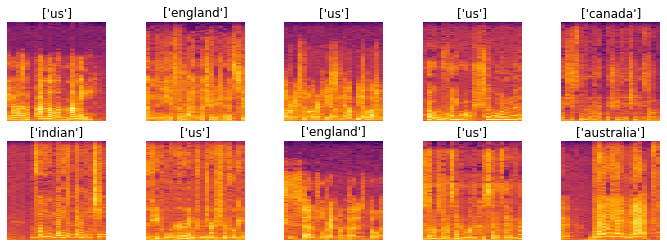

In [7]:
# Show first 10 images in the training set
fig = plt.figure(figsize=[12,4])
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(X_train_I[i,:,:,:])
    ax.set_title(encoder.inverse_transform([y_train[i]]))
    ax.axis("off")

Because of the large number of files in the database and due to computational limits, we can not load the whole dataset as a single variable. Instead we will use the ImageGenerator class provided by keras as follow:

In [10]:
# Temporal test
tmp_train = pd.read_csv ('Data/tmp/testing.csv')

tmp_X_train = tmp_train.drop(['filename', 'accent'], axis=1)
tmp_path_train = tmp_train['filename'].to_numpy()
tmp_y_train = tmp_train['accent'].to_numpy()

tmp_y_train = encoder.transform(tmp_y_train)

In [15]:
# First we need to organize the files in subfolders and classes

# Trining
source = '/home/leonardo/PythonProjects/CAB420-2021 Assignment 2/Data/tmp/spectograms/'
target = '/home/leonardo/PythonProjects/CAB420-2021 Assignment 2/Data/tmp/spectograms_dataset/test/'

total = len(tmp_path_train)
print('\nMoving Training data... ')
for i, filename in enumerate(tmp_path_train):
    print('Moving Training data... %d/%d' %(i+1, total))
    shutil.move(source + filename + '.png', target + str(tmp_y_train[i]))
print('Moving Training data completed %d/%d' %(i+1, total))


Moving Training data... 
Moving Training data... 1/20
Moving Training data... 2/20
Moving Training data... 3/20
Moving Training data... 4/20
Moving Training data... 5/20
Moving Training data... 6/20
Moving Training data... 7/20
Moving Training data... 8/20
Moving Training data... 9/20
Moving Training data... 10/20
Moving Training data... 11/20
Moving Training data... 12/20
Moving Training data... 13/20
Moving Training data... 14/20
Moving Training data... 15/20
Moving Training data... 16/20
Moving Training data... 17/20
Moving Training data... 18/20
Moving Training data... 19/20
Moving Training data... 20/20
Moving Training data completed 20/20
